# Plotting


## v1-question_prob=1.0

There is one different thing in the RoomEnv from the original AAAI-2023 paper: The reward is either +1 or -1, instead of +1 or 0.

In [2]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import logging

logger = logging.getLogger()
logger.disabled = True

from glob import glob
import numpy as np

from humemai.utils import read_yaml


foo = [
    (
        foo.split("training_results/")[-1].split("/")[0],
        read_yaml(foo)["test_score"]["mean"],
    )
    for foo in glob("training_results/*/*/results.yaml")
]
for baz in set([bar[0] for bar in foo]):
    bar = [bar for bar in foo if bar[0] == baz]
    bar = sorted(bar, key=lambda x: x[1], reverse=True)
    print(
        bar[0][0],
        "\n",
        round(np.mean([qux[1] for qux in bar])),
        "\t",
        round(np.std([qux[1] for qux in bar])),
        "\n",
    )

dqn-semantic-pretrained 
 82 	 9 

rainbow-semantic-pretrained 
 78 	 14 

dqn-semantic-scratch 
 69 	 15 

random_agent 
 36 	 5 

rainbow-semantic-scratch 
 71 	 14 

semantic_only_agent 
 57 	 1 

episodic_only_agent 
 46 	 4 



In [33]:
bar[0][0]

'dqn-semantic-scratch'

STEP: 42

SCRATCH: {'state': ["[{'human': 'Ann', 'object': 'bowl', 'object_location': 'cupboard', 'timestamp': 2}, {'human': 'Anthony', 'object': 'sheep', 'object_location': 'farm', 'timestamp': 3}, {'human': 'Arthur', 'object': 'donut', 'object_location': 'bakery', 'timestamp': 4}, {'human': 'Barbara', 'object': 'donut', 'object_location': 'lap', 'timestamp': 5}, {'human': 'Brenda', 'object': 'bowl', 'object_location': 'farm', 'timestamp': 8}, {'human': 'Brittany', 'object': 'keyboard', 'object_location': 'cupboard', 'timestamp': 9}, {'human': 'Catherine', 'object': 'bicycle', 'object_location': 'home', 'timestamp': 12}, {'human': 'Christopher', 'object': 'sheep', 'object_location': 'movie', 'timestamp': 14}, {'human': 'Donald', 'object': 'dog', 'object_location': 'kitchen', 'timestamp': 17}, {'human': 'Frank', 'object': 'train', 'object_location': 'circus', 'timestamp': 22}, {'human': 'Gloria', 'object': 'sheep', 'object_location': 'lap', 'timestamp': 23}, {'human': 'Isabella', 'obje

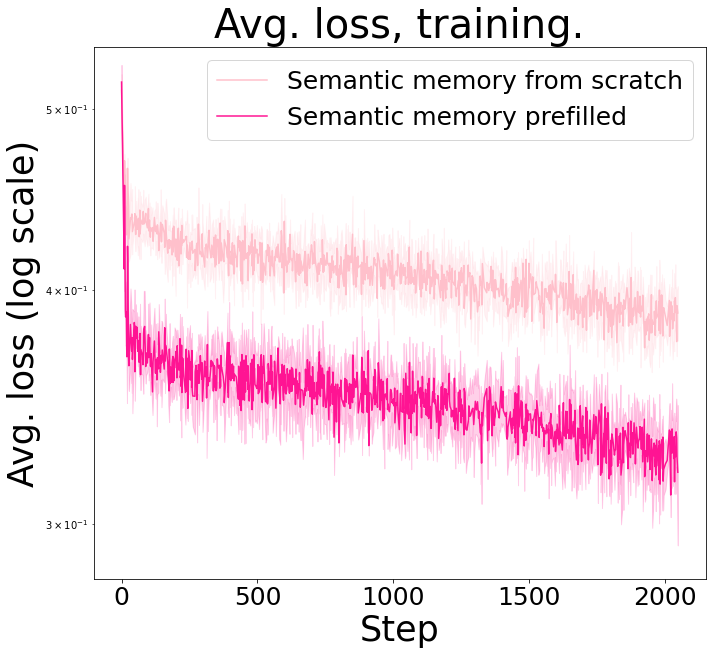

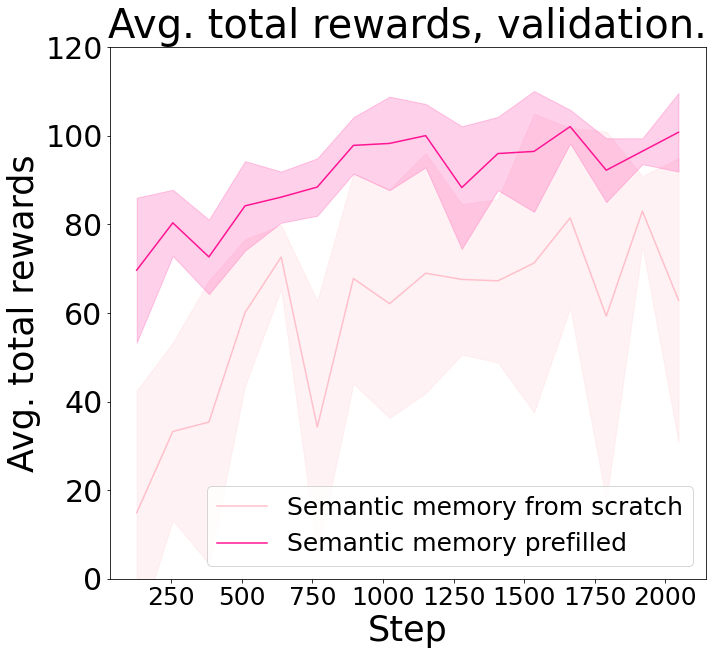

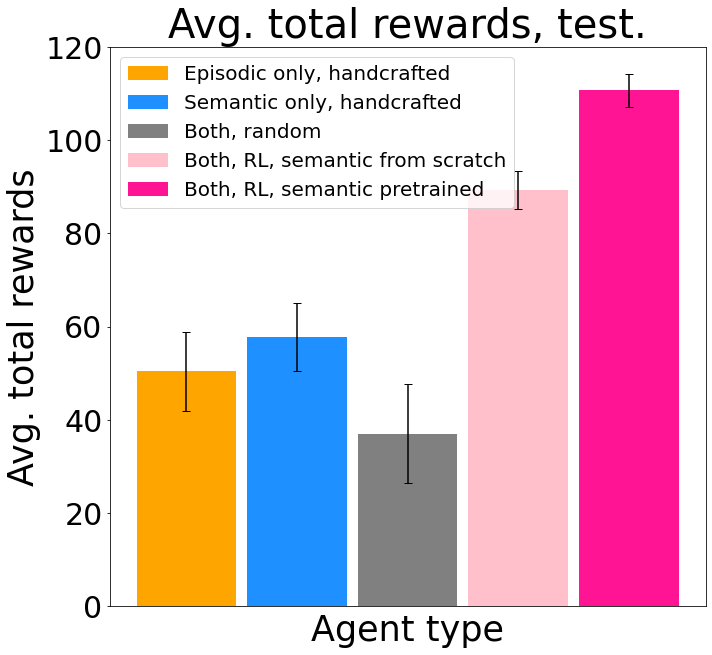

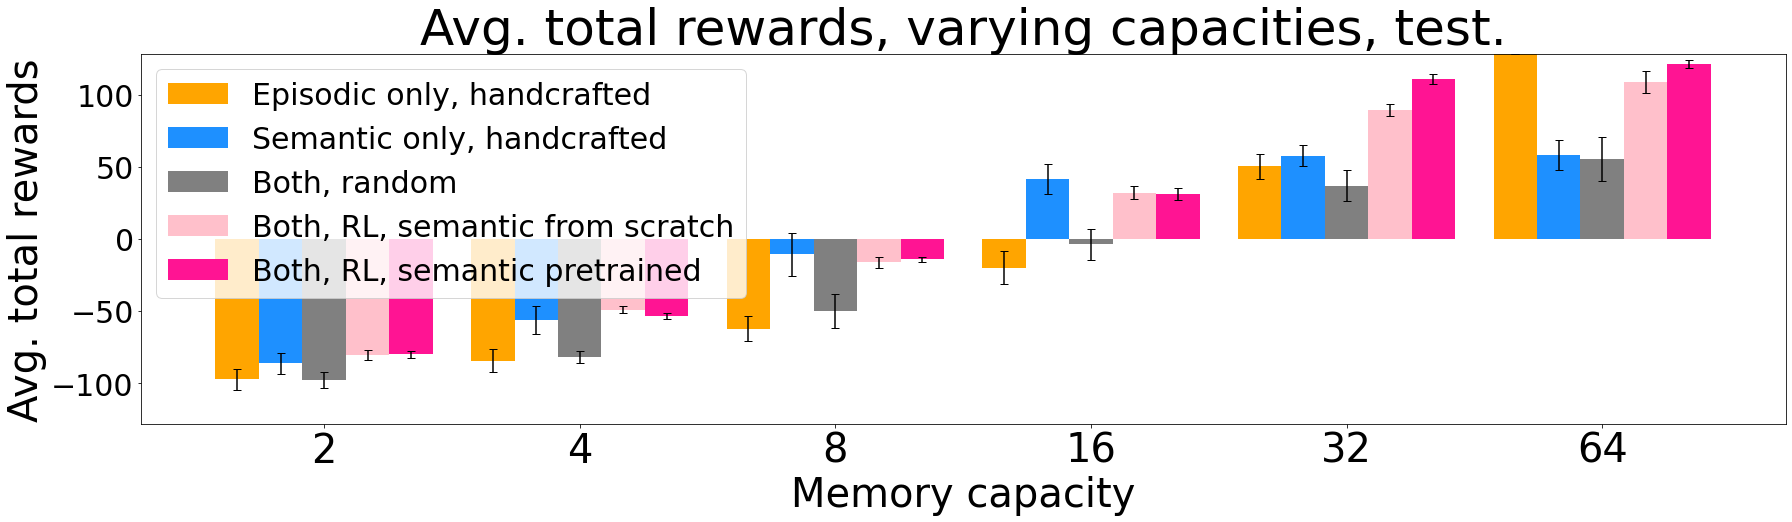

In [1]:
from plotting import (
    plot_training_validation_results,
    plot_test_results,
    plot_test_results_all_capacities,
)
from utils import read_json

plot_training_validation_results(
    data_dir="./data/v1-question_prob=1.0/",
    kind="train_loss",
    capacity=32,
    save_dir="./figures/",
    ymin=None,
    ymax=None,
    ylog=True,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="upper right",
)

plot_training_validation_results(
    data_dir="./data/v1-question_prob=1.0/",
    kind="val_total_reward_mean",
    capacity=32,
    save_dir="./figures/",
    ymin=0,
    ymax=120,
    ylog=False,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="lower right",
)

plot_test_results(
    data_dir="./data/v1-question_prob=1.0/",
    capacity=32,
    save_dir="./figures/",
    ymin=0,
    ymax=120,
    des_size="l",
    figsize=(10, 10),
    legend_loc="upper left",
    question_prob=1.0,
    allow_random_human=False,
    allow_random_question=False,
)

plot_test_results_all_capacities(
    data_dir="./data/v1-question_prob=1.0/",
    save_dir="./figures/",
    ymin=-128,
    ymax=128,
    des_size="l",
    figsize=(25, 8),
    legend_loc="upper left",
    question_prob=1.0,
    allow_random_human=False,
    allow_random_question=False,
)

test_debug_scratch_path = "./models/v1-question_prob=1.0/allow_random_human=False_allow_random_question=False_pretrain_semantic=False_varying_rewards=False_des_size=l_capacity=32_question_prob=1.0_seed=2/test_debug-mean=95.0-std=6.017.json"
test_debug_scratch = read_json(test_debug_scratch_path)["0"]
test_debug_pretrained_path = "./models/v1-question_prob=1.0/allow_random_human=False_allow_random_question=False_pretrain_semantic=True_varying_rewards=False_des_size=l_capacity=32_question_prob=1.0_seed=0/test_debug-mean=114.2-std=5.828.json"
test_debug_pretrained = read_json(test_debug_pretrained_path)["0"]

for step in [42]:
    print(f"STEP: {step}")
    print()
    print(f"SCRATCH: {test_debug_scratch[step]}")
    print()
    print(f"PRETRAINED: {test_debug_pretrained[step]}")
    print()
    print(
        "----------------------------------------------------------------------------"
    )